In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

C:\Users\Korbi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\Users\Korbi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numb

# Training curves:

In [2]:
train_history = {}

for rnn in ['LSTM', 'GRU', 'BiLSTM']:
    with open(f'results/SweDeClin-BERT-{rnn}/train_history.pkl', 'rb') as f:
        train_history[rnn] = pkl.load(f)

In [3]:
train_history['LSTM']

{'loss': [0.6773690581321716,
  0.4774235486984253,
  0.2785458564758301,
  0.21535757184028625,
  0.20186221599578857],
 'val_loss': [0.5005918145179749,
  0.3515026271343231,
  0.31941935420036316,
  0.3223402798175812,
  0.3225719630718231],
 'lr': [2e-05, 2e-05, 2e-06, 2e-07, 2e-08]}

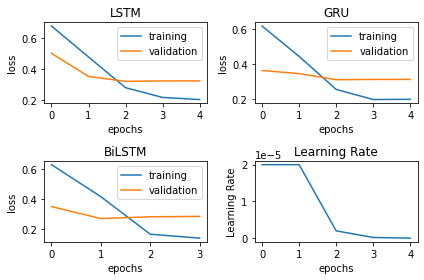

In [4]:
for i, rnn in enumerate(train_history):
    ax = plt.subplot(2,2, i+1)
    ax.plot(train_history[rnn]['loss'], label='training')
    ax.plot(train_history[rnn]['val_loss'], label='validation')
    ax.set_title(rnn)
    ax.set_xlabel('epochs')
    ax.set_ylabel('loss')
    ax.legend()

ax = plt.subplot(2,2, 4)
ax.plot(train_history['LSTM']['lr'])
ax.set_title('Learning Rate')
ax.set_xlabel('epochs')
ax.set_ylabel('Learning Rate')

plt.tight_layout()
plt.show()

# Performance:

In [5]:
predictions = {}

for rnn in ['LSTM', 'GRU', 'BiLSTM']:
    with open(f'results/SweDeClin-BERT-{rnn}/predictions.pkl', 'rb') as f:
        predictions[rnn] = pkl.load(f)
    predictions[rnn]['y_pred'] = (predictions[rnn]['y_pred'].flatten() > 0.64).astype(int)

In [6]:
predictions['LSTM']

{'y_pred': array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 0]),
 'y_true': array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 0], dtype=int64)}

In [7]:
for rnn in predictions:
    print(f'{rnn}:')
    print(f'  precision: {precision_score(predictions[rnn]["y_true"],predictions[rnn]["y_pred"]):.2}')
    print(f'  recall:    {recall_score(predictions[rnn]["y_true"],predictions[rnn]["y_pred"]):.2}\n')
    print(f'  f1:        {f1_score(predictions[rnn]["y_true"],predictions[rnn]["y_pred"]):.2}')
    print(f'  accuracy:  {accuracy_score(predictions[rnn]["y_true"],predictions[rnn]["y_pred"]):.2}\n\n')

LSTM:
  precision: 0.94
  recall:    0.85

  f1:        0.89
  accuracy:  0.85


GRU:
  precision: 0.9
  recall:    0.82

  f1:        0.86
  accuracy:  0.8


BiLSTM:
  precision: 0.88
  recall:    0.88

  f1:        0.88
  accuracy:  0.83


